In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pneumonia_predictor.backend.data_fetcher import load_data
from pneumonia_predictor.backend.rf_active_smote import RfActiveSMOTE
from pneumonia_predictor.backend.rf_smote import RfSMOTE
from pneumonia_predictor.backend.tester import ModelTester

In [2]:
X_train, y_train, X_test, y_test = (
    load_data("X_train"),
    load_data("y_train"),
    load_data("X_test"),
    load_data("y_test"),
)

In [3]:
rf_smote = RfSMOTE(X_train, y_train, X_test, y_test, "pneumonia_admission")
rf_active_smote = RfActiveSMOTE(X_train, y_train, X_test, y_test, "pneumonia_admission")

In [4]:
tester = ModelTester(rf_smote, rf_active_smote)

In [5]:
tester.run_tests(10)

In [6]:
tester.model_a_res

,Test,accuracy,precision,recall,f1-score,Average
0,1,0.536667,0.566042,0.536667,0.548244,0.546905
1,2,0.520000,0.571233,0.520000,0.536057,0.536822
2,3,0.510000,0.567441,0.510000,0.526865,0.528576
3,4,0.503333,0.565681,0.503333,0.520607,0.523239
4,5,0.495000,0.562828,0.495000,0.512551,0.516345
5,6,0.496667,0.565106,0.496667,0.514145,0.518146
6,7,0.488333,0.558556,0.488333,0.506038,0.510315
7,8,0.495000,0.568970,0.495000,0.512274,0.517811
8,9,0.490000,0.566995,0.490000,0.507201,0.513549
9,10,0.491667,0.568073,0.491667,0.508866,0.515068


In [7]:
tester.model_b_res

,Test,accuracy,precision,recall,f1-score,Average
0,1,0.541333,0.563403,0.541333,0.550210,0.549070
1,2,0.518667,0.566826,0.518667,0.534351,0.534627
2,3,0.499667,0.560720,0.499667,0.516996,0.519262
3,4,0.487667,0.556200,0.487667,0.505443,0.509244
4,5,0.486333,0.557507,0.486333,0.504054,0.508557
5,6,0.484000,0.558903,0.484000,0.501560,0.507116
6,7,0.477333,0.555256,0.477333,0.494841,0.501191
7,8,0.478333,0.558120,0.478333,0.495603,0.502597
8,9,0.477000,0.558223,0.477000,0.494140,0.501591
9,10,0.470333,0.551077,0.470333,0.487716,0.494865


In [8]:
tester.compare_res

,Metrics,Random Forest + SMOTE Model,Random Forest + Active SMOTE Model,t-value,p-value
0,accuracy,0.536667,0.541333,4.450177,0.001600
1,precision,0.566042,0.563403,5.519558,0.000371
2,recall,0.536667,0.541333,4.450177,0.001600
3,f1-score,0.548244,0.550210,4.990970,0.000748


## Feature importance (mean decrease in impurity - MDI)

In [9]:
feature_names = [
    "age",
    "sex",
    "chronic_respiratory_disease",
    "diabetes_mellitus",
    "heart_failure",
    "cancer",
    "chronic_kidney_disease",
]

### RfSMOTE

In [10]:
start_time = time.time()
importances = rf_smote.classifier.feature_importances_
rf_smote_std = np.std(
    [tree.feature_importances_ for tree in rf_smote.classifier.estimators_], axis=0
)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.028 seconds


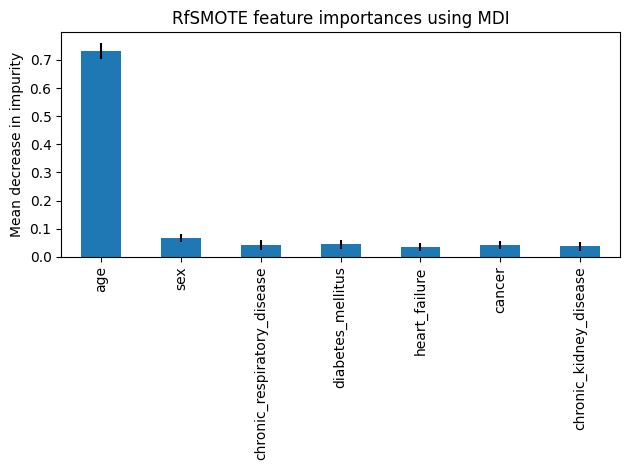

In [11]:
rf_smote_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_smote_importances.plot.bar(yerr=rf_smote_std, ax=ax)
ax.set_title("RfSMOTE feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### RfActiveSMOTE

In [12]:
start_time = time.time()
importances = rf_active_smote.classifier.feature_importances_
rf_active_smote_std = np.std(
    [tree.feature_importances_ for tree in rf_active_smote.classifier.estimators_],
    axis=0,
)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.041 seconds


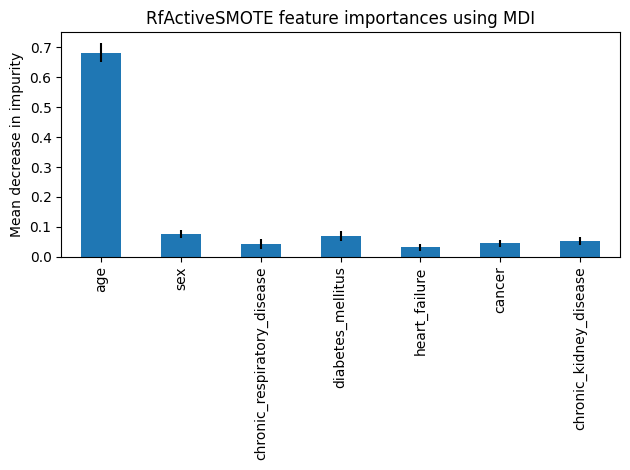

In [13]:
rf_active_smote_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_active_smote_importances.plot.bar(yerr=rf_active_smote_std, ax=ax)
ax.set_title("RfActiveSMOTE feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()